In [1]:
import numpy
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
dt1 = numpy.fromfile(open('C:/Users/janat/Downloads/dados_1'), dtype=numpy.uint8)
dt2 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_2"), dtype=numpy.uint8)
dt3 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_3"), dtype=numpy.uint8)
dt4 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_4"), dtype=numpy.uint8)
dt5 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_5"), dtype=numpy.uint8)
dt6 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_6"), dtype=numpy.uint8)
dt7 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_7"), dtype=numpy.uint8)
dt8 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_3"), dtype=numpy.uint8) #NO MESSAGE
dt9 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_2"), dtype=numpy.uint8) #NO MESSAGE
dt10 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_1"), dtype=numpy.uint8) #NO MESSAGE



In [2]:
print(" shape dados 1 = {} \n shape dados 2 {} \n shape dados 3 {} \n shape dados 4 {} " 
     "\n shape dados 5 = {} \n shape dados 6 {} \n  shape dados 7 = {} \n shape dados 8 {} \n"
     "\n shape dados 9 = {} \n shape dados 10 {}"
      .format(dt1.shape,dt2.shape, dt3.shape,dt4.shape,dt5.shape,
             dt6.shape,dt7.shape, dt8.shape,dt9.shape,dt10.shape))

 shape dados 1 = (17297408,) 
 shape dados 2 (19918848,) 
 shape dados 3 (14155776,) 
 shape dados 4 (16248832,) 
 shape dados 5 = (16150528,) 
 shape dados 6 (15200256,) 
  shape dados 7 = (14938112,) 
 shape dados 8 (14938112,) 

 shape dados 9 = (17559552,) 
 shape dados 10 (17297408,)


In [3]:
# Creating empy array to fill each columns with the dataset
empty_1 =  np.empty([5])
empty_1 = pd.DataFrame()
empty_1

""


In [5]:

conjunto = [dt1,dt2,dt3,dt4,dt5]
i=0
for i in range(0,5):
    empty_1[i] = pd.DataFrame(conjunto[i])
    i+=1
FM_1 = empty_1.loc[:49999]
FM_1 = FM_1.rename(columns = {0:'sinal1', 1:'sinal2' , 2:'sinal3', 3:'sinal4',4:'sinal5'})
FM_1['Signal'] = 1 # AS KNOWS EXISTENCE OF SIGNAL
FM_1

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,157,217,157.0,157.0,217.0,1
1,184,75,184.0,184.0,75.0,1
2,38,222,38.0,38.0,222.0,1
3,57,184,57.0,57.0,184.0,1
4,217,217,217.0,157.0,157.0,1
...,...,...,...,...,...,...
49995,59,57,187.0,58.0,58.0,1
49996,129,233,148.0,135.0,103.0,1
49997,153,42,238.0,101.0,226.0,1
49998,153,94,128.0,60.0,163.0,1


In [13]:
FM_1[['sinal1']]

,sinal1
0,157
1,184
2,38
3,57
4,217
...,...
49995,59
49996,129
49997,153
49998,153


In [14]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply
dados = mm.fit_transform(FM_1[['sinal1']])
dados

array([[ 0.26104418],
       [ 0.47791165],
       [-0.69477912],
       ...,
       [ 0.22891566],
       [ 0.22891566],
       [-0.52610442]])

<function matplotlib.pyplot.show(close=None, block=None)>

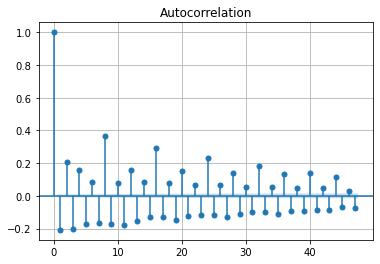

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plot_acf(dados)
plt.grid(True)
plt.show

In [23]:
FM_1.mean()

sinal1    121.09450
sinal2    121.95694
sinal3    121.19648
sinal4    120.77914
sinal5    121.88224
Signal      1.00000
dtype: float64

In [24]:
# Creating empy array to fill each columns with the dataset
empty_2 =  np.empty([3])
empty_2 = pd.DataFrame()
empty_2

conjunto = [dt10,dt9,dt8]
i=0
for i in range(0,3):
    empty_2[i] = pd.DataFrame(conjunto[i])
    i+=1
FM_2 = empty_2.loc[:49999]
FM_02 = empty_2.loc[49999:99999]
FM_2 = FM_2.rename(columns = {0:'sinal1', 1:'sinal2' , 2 :'sinal3'})
FM_02 = FM_02.rename(columns = {0:'sinal1', 1:'sinal2' , 2 :'sinal3'}).reset_index()
FM_02 = FM_02.drop(columns='index')
FM_02.shape

(50001, 3)

In [25]:
FM_2['sinal4'] = FM_02['sinal1']
FM_2['sinal5'] = FM_02['sinal2']
FM_2['Signal'] = 0
FM_2 # NO SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,217,217,157.0,59,186,0
1,75,75,184.0,0,162,0
2,222,222,38.0,205,60,0
3,184,184,57.0,76,212,0
4,217,157,217.0,187,57,0
...,...,...,...,...,...,...
49995,187,59,186.0,76,59,0
49996,97,147,47.0,187,187,0
49997,127,238,17.0,13,0,0
49998,21,128,42.0,2,205,0


<function matplotlib.pyplot.show(close=None, block=None)>

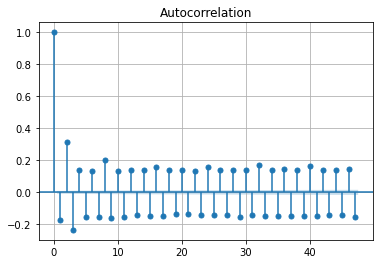

In [26]:
mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply
nosignal = mm.fit_transform(FM_2[['sinal1']])
nosignal

plot_acf(nosignal)
plt.grid(True)
plt.show

In [27]:
FM_2.mean()

sinal1    120.71370
sinal2    120.58824
sinal3    120.32434
sinal4    120.65196
sinal5    121.13560
Signal      0.00000
dtype: float64

In [28]:
gnu = pd.concat([FM_1, FM_2]).reset_index()
#gnu= gnu.drop(columns=['index'])
gnu # PUTTING ALL TOGETHER

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,157,217,157.0,157.0,217.0,1
1,1,184,75,184.0,184.0,75.0,1
2,2,38,222,38.0,38.0,222.0,1
3,3,57,184,57.0,57.0,184.0,1
4,4,217,217,217.0,157.0,157.0,1
...,...,...,...,...,...,...,...
99995,49995,187,59,186.0,76.0,59.0,0
99996,49996,97,147,47.0,187.0,187.0,0
99997,49997,127,238,17.0,13.0,0.0,0
99998,49998,21,128,42.0,2.0,205.0,0


In [29]:
gnu[gnu['Signal'] ==1].head() # JUST THE ONE HAS SIGNAL

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,157,217,157.0,157.0,217.0,1
1,1,184,75,184.0,184.0,75.0,1
2,2,38,222,38.0,38.0,222.0,1
3,3,57,184,57.0,57.0,184.0,1
4,4,217,217,217.0,157.0,157.0,1


In [30]:
gnu[gnu['Signal'] ==0].head() # NO SIGNAL

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
50000,0,217,217,157.0,59.0,186.0,0
50001,1,75,75,184.0,0.0,162.0,0
50002,2,222,222,38.0,205.0,60.0,0
50003,3,184,184,57.0,76.0,212.0,0
50004,4,217,157,217.0,187.0,57.0,0


In [31]:
gnu.shape

(100000, 7)

In [32]:
X = gnu.iloc[:,1:6]
X

,sinal1,sinal2,sinal3,sinal4,sinal5
0,157,217,157.0,157.0,217.0
1,184,75,184.0,184.0,75.0
2,38,222,38.0,38.0,222.0
3,57,184,57.0,57.0,184.0
4,217,217,217.0,157.0,157.0
...,...,...,...,...,...
99995,187,59,186.0,76.0,59.0
99996,97,147,47.0,187.0,187.0
99997,127,238,17.0,13.0,0.0
99998,21,128,42.0,2.0,205.0


In [33]:
y = gnu.iloc[:,6]
y # TARGET

0        1
1        1
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Signal, Length: 100000, dtype: int64

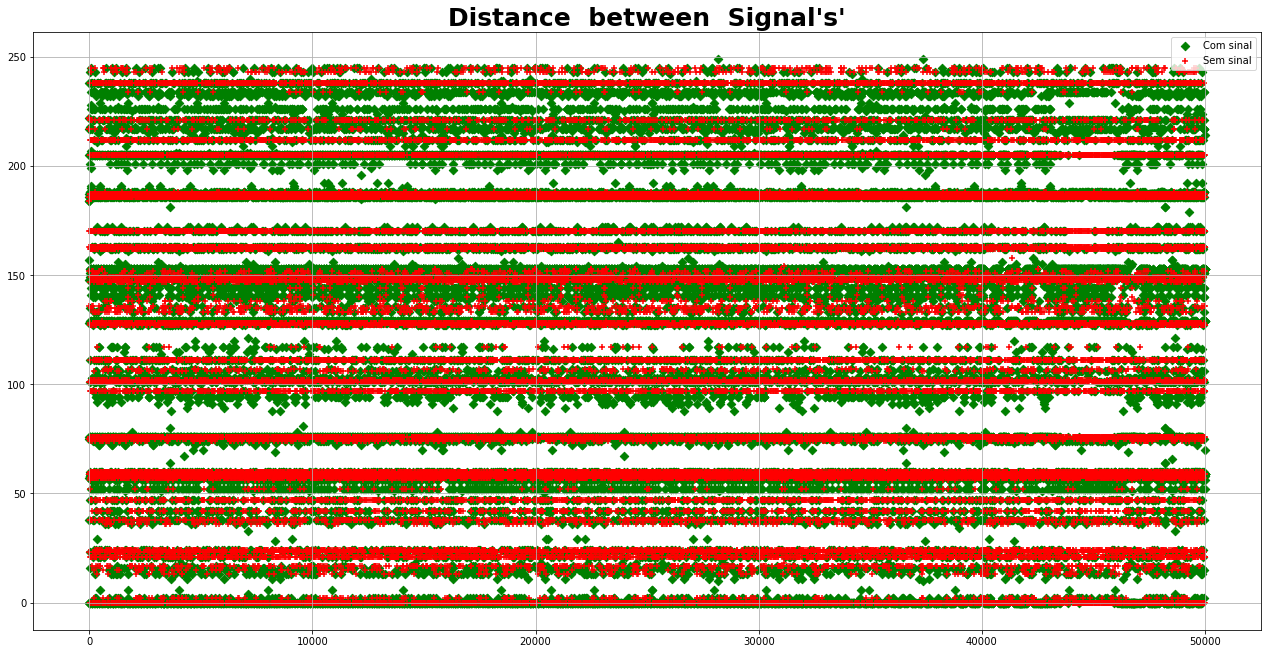

In [34]:
#df0= gnu[:49999] #NO SIGNAL
#df1= gnu[49999:99999] # NO SIGNAL
df0= FM_1.drop(columns='Signal').reset_index()#NO SIGNAL
df1= FM_2.drop(columns='Signal').reset_index() # NO SIGNAL
import matplotlib.pyplot as plt
%notebook jupyter  
plt.figure(figsize=(22,11))
plt.scatter(df0['index'],df0['sinal1'], color= 'g', marker = "D",label = 'Com sinal')
plt.scatter(df1['index'],df1['sinal1'], color= 'r', marker = "+",label = 'Sem sinal')
plt.title("Distance  between  Signal's'", size = 25, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()



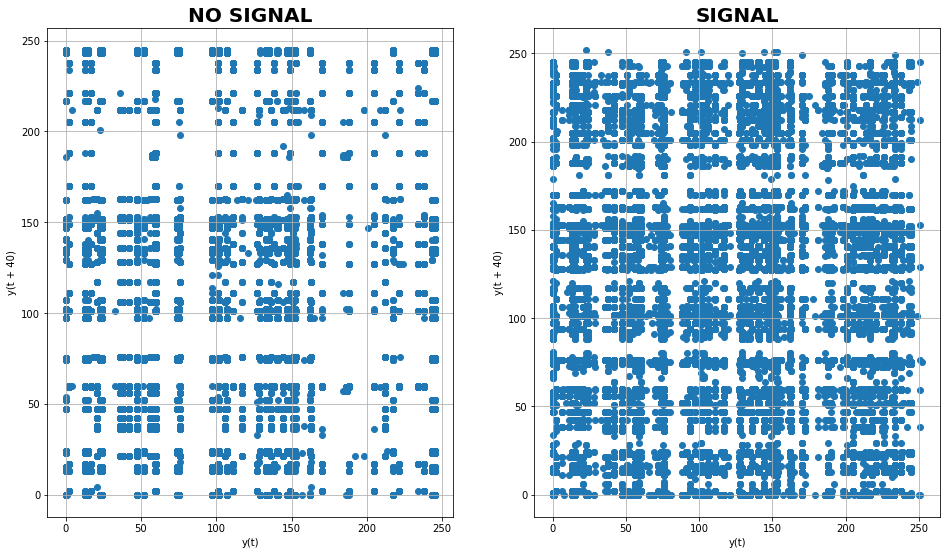

In [35]:
from pandas.plotting import lag_plot
plt.figure(1, figsize = [16,9])
##############
nosignal = FM_2.drop(columns='Signal')
nosignal.iloc[:,1]
plt.subplot(1,2,1)
lag_plot(nosignal,lag=40) # NO SIGNAL
plt.title("NO SIGNAL" ,size = 20, fontweight = 'bold')
plt.grid()
############
plt.subplot(1,2,2)
signal = FM_1.drop(columns='Signal')
signal.iloc[:,1]
lag_plot(signal,lag=40) # SIGNAL
plt.title("SIGNAL" ,size = 20, fontweight = 'bold')
plt.grid()

In [36]:
gnu.rename_axis(['time'])

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
time,,,,,,,
0,0,157,217,157.0,157.0,217.0,1
1,1,184,75,184.0,184.0,75.0,1
2,2,38,222,38.0,38.0,222.0,1
3,3,57,184,57.0,57.0,184.0,1
4,4,217,217,217.0,157.0,157.0,1
...,...,...,...,...,...,...,...
99995,49995,187,59,186.0,76.0,59.0,0
99996,49996,97,147,47.0,187.0,187.0,0
99997,49997,127,238,17.0,13.0,0.0,0


In [37]:
FM_1.describe() #SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.0
mean,121.094500,121.95694,121.196480,120.779140,121.882240,1.0
std,68.112934,68.42058,67.841916,68.701626,68.716754,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,59.000000,59.00000,59.000000,59.000000,59.000000,1.0
50%,129.000000,129.00000,129.000000,129.000000,129.000000,1.0
75%,187.000000,187.00000,187.000000,187.000000,187.000000,1.0
max,249.000000,245.00000,251.000000,252.000000,251.000000,1.0


In [38]:
FM_2.describe() # NO SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,120.713700,120.588240,120.324340,120.651960,121.135600,0.0
std,67.987076,67.829583,67.723277,67.716733,67.665228,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,59.000000,59.000000,59.000000,59.000000,59.000000,0.0
50%,127.000000,127.000000,127.000000,127.000000,127.000000,0.0
75%,186.000000,186.000000,186.000000,186.000000,186.000000,0.0
max,245.000000,245.000000,245.000000,245.000000,245.000000,0.0


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20) # 30 % TO TEST 

print("lenght x train = {} \n lenght x test = {} " .format(len(X_train), len(X_test)))

lenght x train = 80000 
 lenght x test = 20000 


In [44]:
mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
#gnu0 = mm.fit_transform(df0)
#gnu1 = mm.fit_transform(df1)

In [45]:
X_train

array([[-0.10843373,  0.3877551 , -0.11553785, -0.23015873, -0.40239044],
       [ 0.50200803,  0.52653061, -0.52988048,  0.29365079,  0.01992032],
       [-0.62248996,  0.04489796,  0.29880478, -0.1984127 , -0.11553785],
       ...,
       [-0.52610442,  0.04489796,  0.01992032,  0.34920635,  0.35458167],
       [-0.62248996, -0.80408163,  0.17928287, -0.53968254,  0.48207171],
       [-0.51807229,  0.21632653, -0.52988048,  0.17460317, -1.        ]])

In [46]:
X_test

array([[ 0.50200803, -0.53469388,  0.49003984, -0.53174603, -0.52988048],
       [ 0.22891566, -0.65714286,  0.63346614,  0.62698413,  0.63346614],
       [ 0.18875502, -0.80408163, -0.80876494,  0.47619048, -0.54581673],
       ...,
       [-0.38955823,  0.73061224, -0.39442231, -0.52380952,  0.89641434],
       [ 0.22891566,  0.67346939,  0.35458167,  0.21428571,  0.21912351],
       [-0.69477912, -0.37959184, -0.69721116, -0.11904762,  0.35458167]])

### Creating KNN = ( K Neighrest Neighbour Classifier )
##### p, default=2
* Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. \newline

* for p = 2 , we have $\sqrt{(a1-b2)^{2} +(a1-b2)^{2}}$ , Euclidean Distance 
* for p = 1 , we have $ |(a1-b2)| + |(a1-b2)| $ , Manhattan Distance 

##### weights{‘uniform’, ‘distance’} or callable, default=’uniform’

* uniform’ : uniform weights. All points in each neighborhood are weighted equally.
* ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

#### Types of Knn method
* KNN Classifier = chooses the same class as most of the 'n' nearest neighbors of the data to be sorted
* KNN Regressor = choose the average of the label of the 'n' neighbors

### Number of K, how do we choose ?
* $\sqrt{n}$ , where n can be number of data points
* Odd value of K is selected to avoid confusion between two classes of data
* By choosing smaller number, you can find yourself not much accurate, by chossing larger number , the classification may be tend to the label with more frequence

In [47]:
knn = KNeighborsClassifier(n_neighbors= 9, weights='uniform',p=1)  # WE CHOOSE MANHATAM DISTANCE
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [48]:
print(y_pred.shape)
print(y_test.shape)


(20000,)
(20000,)


RMSE (root mean squared error): is the measure that calculates "the root mean square" of errors between observed (actual) values and predictions (hypotheses).

$\sqrt{\frac{1}{n}\sum(yj - \vec{y}j)^{2} }$

* expresses the mean error of the predictive model, in relation to the original data (training and/or testing).
* They are in the 0-infinity range and return the magnitude of errors and not their direction.
* The smaller the better the cases

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt
train_preds = knn.predict(X_train)
mse_1 = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_1)
###############################################
test_preds = knn.predict(X_test)
mse_2 = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_2)
##############################################
#,'Accuracy':accuracy.score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds)
metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test,y_test)
          ,'Accuracy':accuracy_score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds),
          'Recall':recall_score(y_test,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.272075,0.30814,0.90505,0.90505,0.904328,0.894459


#### How the score number was calculated ?

* Accuracy = $\frac{True Positive (TP) + False Positive (FP)}{Total} $

is the number of hits in our model divided by the total sample.

* Precision = $\frac{True Positive (TP) }{True Positive (TP) + False Positive (FP)} $

of all the data classified as positive, how many are actually positive.

* Recall = $\frac{True Positive (TP) }{True Positive (TP) + False Negative (FP)} $ 

what is the percentage of data classified as positive compared to the actual number of positives that exist in our sample.


* F1_Score = $\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$ 

this metric combines precision and recall in order to bring a single number that determines the overall quality of our model

Improving kNN performance in scikit-learn using GridSearchCV

So far we've used k =3 in kNN, but let's use GridSearchCV to find the best value for K .
When you use near neighbors, you have a much more variable prediction than you will use more neighbors:
* If you use only one neighbor, a forecast may change mainly from one point to another. When you think of your own neighbors, one may be quite different from the others. If you lived near a 1-N forecast outlier your right house.
* If you have multiple data points, the impact of an extremely different neighbor will be much smaller.
* If you use next risks, a prediction of each point risks being too close. 

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance'],'p':range(1,2)
                #,'leaf_size':range(0,30)
             #,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
             }

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance'],'p':range(1,2)
              #,'leaf_size':range(0,30)
             #,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                        })

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 'p': range(1, 2),
                         'weights': ['uniform', 'distance']})

In [51]:
gridsearch.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [54]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
######################
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

################################
acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':gridsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,test_preds_grid),
       'F1_Score':f1_score(y_test,test_preds_grid),
      'Recall':recall_score(y_test,test_preds_grid)}
###############################
acc = pd.DataFrame([acc])
acc

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
0,0.041833,0.294449,0.9133,0.9133,0.912069,0.896253


#### Confusion Matrix
In the field of Machine Learning, a confusion matrix is a table that allows the visualization of the performance of a classification animal
* Compute confusion matrix to evaluate the accuracy of a classification.
* By definition a confusion matrix *C* is such that $C\small{i,j}*$ is equal to the number of observations known to be in group \textit{i}  and predicted to be in group \textit{j}  .

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds_grid)
cm

array([[9273,  693],
       [1041, 8993]], dtype=int64)

Text(141.0, 0.5, 'Truth')

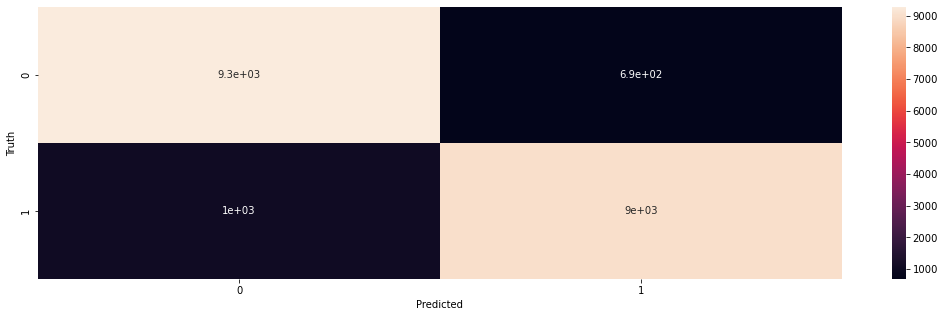

In [56]:
import seaborn as sns
plt.figure(figsize = (18,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, test_preds_grid))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9966
           1       0.93      0.90      0.91     10034

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [ ]:
#from sklearn.model_selection import cross_val_score

#scores = cross_val_score(gridsearch , X, y,
#                         scoring="neg_mean_squared_error", cv=10)
#tree_rmse_scores = np.sqrt(-scores)